Student Details

Name: Cathal Cronin

ID: 10131531

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

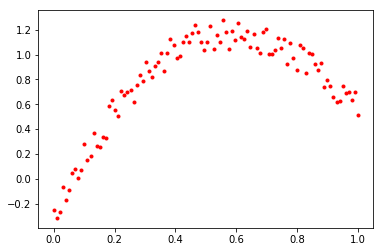

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [7]:
ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0,1,1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


/Users/cathalc/.pyenv/versions/3.5.6/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
  * Using the above code, find the optimum regularization parameter, l. 
    * In order to do so, you will need to decide on a suitable list of l values. 
    * Pick at most 1000 values! 
    * Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

Text(0.5, 1.0, 'Ein and Eout for lambda > 0')

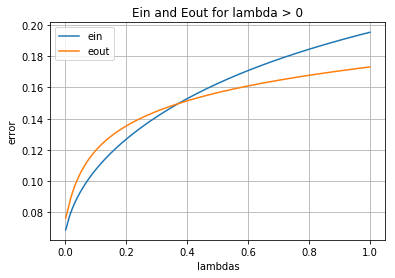

In [8]:
# plot ein, eout for lambda > 0
plt.plot(lambdas[1:],ein[1:], label='ein')
plt.plot(lambdas[1:],eout[1:], label='eout')

plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)
plt.title("Ein and Eout for lambda > 0")

#### comment on graph
The graph shows the Ein and Eout values as we adjust the lambda value. A very small amount of regularisation is required. Setting a large lambda causes the Ein and Eout to diverge as it constrains the model to try and fit the data.

In [9]:
lowest_eout_index = np.argmin(eout)
best_lambda = lambdas[lowest_eout_index]

print("lowest_eout_index: %s" % lowest_eout_index)
print("Best lambda used: %s" % best_lambda)
print("Eout without regularization: %s" % str(eout[0]))
print("Eout with regularization: %s" % eout[lowest_eout_index])
print("Difference: %s" % (eout[0] - eout[lowest_eout_index]))

lowest_eout_index: 1
Best lambda used: 0.001001001001001001
Eout without regularization: 7.486502131591957
Eout with regularization: 0.07620961246484001
Difference: 7.4102925191271165


- It's clear from the above the differnece regularization makes in improving our Eout.

# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

Text(0.5, 1.0, 'Eout by lambda (where lambda> 0)')

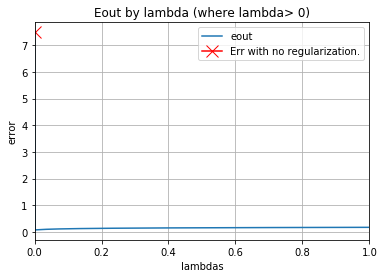

In [10]:
plt.plot(lambdas, eout, label='eout')
plt.plot(lambdas[0], eout[0], marker='x', color='red',  markersize=12, label="Err with no regularization.")
plt.xlim(0, 1)
plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)

plt.title("Eout by lambda (where lambda> 0)")

In [11]:
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

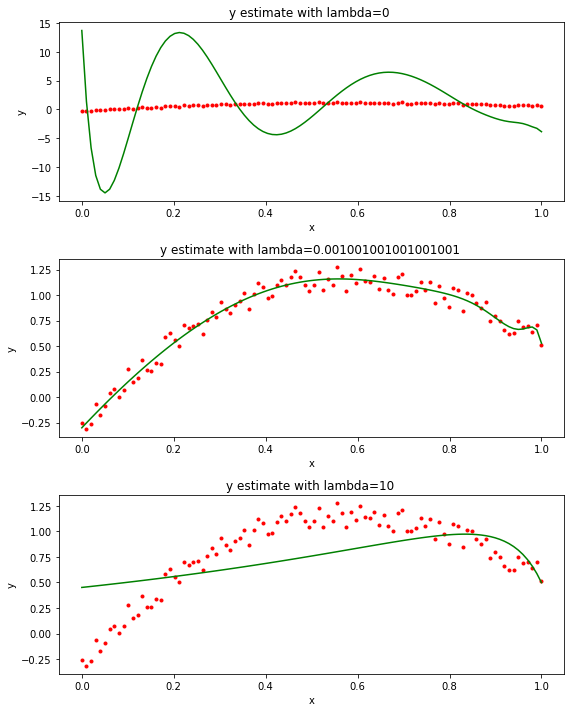

In [12]:
lambdas = np.linspace(0,1,1000)

def experiment(order, l):

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    weights = weights_reg(X_train,y_train,l)
    ein = calc_error(weights, X_train,y_train)
    eout = calc_error(weights, X_test,y_test)
    
    return ein, eout, weights

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('y estimate with lambda=%s ' % str(ls[i-1]))
    plt.plot(X, pred  , 'g', label='lambda=%s' % str(ls[i-1]))
    plt.tight_layout()

plt.show()

In [13]:
print("best lambda: %s" % best_lambda)

best lambda: 0.001001001001001001


- From the above graphs:
    - it's easy to see when no regularisation is used (lambda=0) The curve is a very bad fit.
    - When a small lambda value is used it makes a big difference and now our curve fits nicely and we approximate the target function quite well. 
    - When a large lamda value is used it makes a big difference as well but in a negative way! We're too restricted in trying to fit the data due to too much regularisation. 

# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.

In [33]:
lambdas = np.linspace(0,1,1000)

def get_eval(order, l):
    ein = []
    eout = []
    weights = []
    
    # Perform 10 splits 
    kf = KFold(n_splits=10, shuffle=True, random_state=10131531)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train, y_train,l)
        weights.append(w)
        ein.append(calc_error(w, X_train, y_train))
        eout.append(calc_error(w, X_test, y_test))
    
    Eval = np.mean(eout)
    return Eval


def experiment(order, l):
    ein = []
    eout = []
    weights = []
    
    # Perform 10 splits 
    kf = KFold(n_splits=10, shuffle=True, random_state=10131531)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return ein[lowest_eout_index], eout[lowest_eout_index], weights[lowest_eout_index]

In [36]:
all_eval = []

for l in lambdas:
    my_eval = get_eval(50, l)
    all_eval.append(my_eval)

# Find best values for lamda Eval.
eout_index = np.argmin(all_eval)
best_lambda = lambdas[lowest_eout_index]
print("Eout Index: %s Best Lamda: %s" % (eout_index, best_lambda))

Eout Index: 1 Best Lamda: 0.001001001001001001


### Plot 10-fold cross-validation using 0, best lambda and big lambda

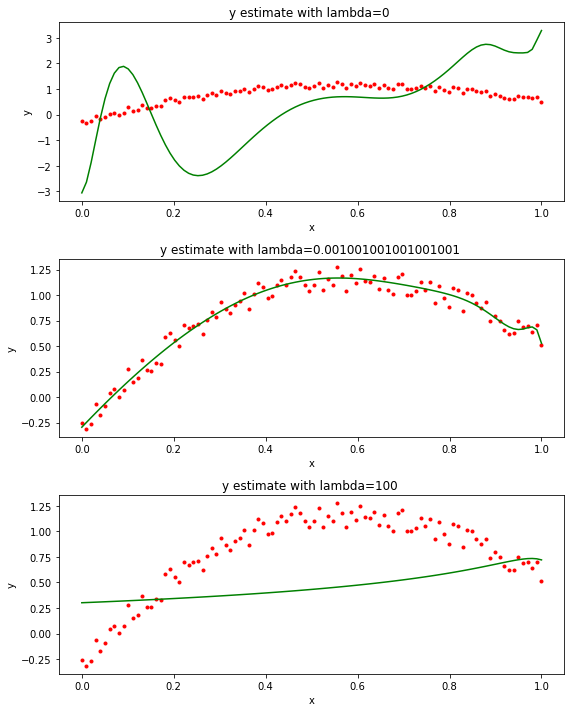

In [38]:
plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 100]

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('y estimate with lambda=%s ' % str(ls[i-1]))
    plt.plot(X, pred  , 'g', label='lambda=%s' % str(ls[i-1]))
    plt.tight_layout()

plt.show()


- Similar to the previous run. The same pattern follows. Using none or too much impacts our approximation of the target function. Using a small value greatly helps.

# Task 6 (CE6002)
  * Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

  * Observe the resulting Eout, and l compare these to previous results. 
    * What do you see? 
    * Is this what you expected?
  * Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
https://scikit-learn.org/stable/auto_examples/cluster/plot_feature_agglomeration_vs_univariate_selection.html#sphx-glr-auto-examples-cluster-plot-feature-agglomeration-vs-univariate-selection-py

In [47]:
def alternate_regression(title, clf):
    score = clf.score(X_trans, y) 
    pred = clf.predict(X_trans)
    params = clf.get_params
    lambdas = clf.alpha_ 
    coeffs = clf.coef_

    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('y function estimated using ' + title)
    plt.plot(X, pred  , 'g', label=title)
    plt.show()

    return score, lambdas


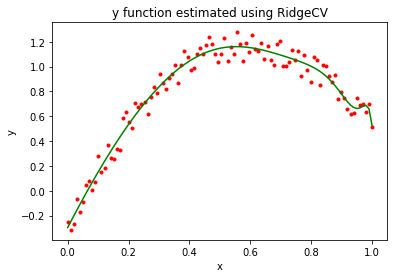

Score 0.9691747175665067:
Lambda 0.001


In [49]:
clf = RidgeCV(alphas=[best_lambda, 1e-3, 1e-2, 1e-1, 1]).fit(X_trans, y)
score, lamdas = alternate_regression("RidgeCV", clf)
print('Score %s:' % score)
print('Lambda %s' % lamdas)

/Users/cathalc/.pyenv/versions/3.5.6/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cathalc/.pyenv/versions/3.5.6/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cathalc/.pyenv/versions/3.5.6/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cathalc/.pyenv/versions/3.5.6/lib/python3.5/site-packages/sklearn/linear_model/coordinate_

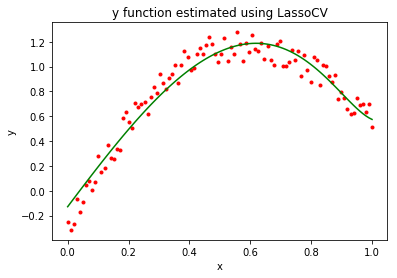

Score 0.9691747175665067:
Lambda 0.001


In [50]:
clf = LassoCV(alphas=[best_lambda, 1e-3, 1e-2, 1e-1, 1], cv=10, random_state=0).fit(X_trans, y)
alternate_regression("LassoCV", clf)
print('Score %s:' % score)
print('Lambda %s' % lamdas)

Very detailed article that goes into depth about Ridge and Lasso.

Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

